# Tanzanian Water Wells Project

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

- Predict the condition of the water wells in Tanzania

### End Users:

- Governments, NGOs

### True business problem:

- Create a model that can, if given data of the water wells , predict if the water well needs repair. 

### Context:

- **False positive** in this context: Predicts that an water well doesn't need repair but it actually does.
    - **Outcome**: The people can't get water from the well.
    
- **False negative** in this context: Predicts that an water well needs repair but it actually doesn't.

    - **Outcome**: Waste money/human resources on checking the well.

### Evaluation 

Which metric (of the ones we've explore so far) would make sense to primarily use as we evaluate our models?

- **Accuracy**
- **Precision**
- Recall
- F1-Score

We can focus on accuracy for ease of use, but should also be maximizing our Precision Score and minimizing False Positives, because false positives are more costly than false negatives.

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

### Training Set Values Exploration

In [4]:
# import pandas
import pandas as pd
# read training data values
X = pd.read_csv("../data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv", index_col='id')

In [5]:
X

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

The data set is pretty large and there are not that many null values

### Drop duplicated columns

From our data exploration process, we discovered that many columns are duplicates of each other, so we are going to drop them from our analysis. For detailed data exploration steps, refer to jupyter notebook named "EDA.ipynb" in notebooks/Samantha.

In [7]:
drop_columns = ["quantity_group", "source_type", "num_private", "waterpoint_type"]
X = X.drop(drop_columns, axis =1)

### y_train Exploration

In [8]:
y = pd.read_csv('../data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv', index_col='id')
y

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
...,...
60739,functional
27263,functional
37057,functional


In [9]:
# convert the dataframe into a series
y = y['status_group']

In [10]:
y.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?
- Can you pipeline your preparation steps to use them consistently in the modeling process?

### Train Test Split

We are not getting the target for our testing data so we are going to treat our training data as if that's all the data we got. So we'll split it into training data, validation data and a holdout set that we will only look at in the end.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, random_state=42, test_size = .1)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42)

### Target Preprocessing

Our target has three unique values: functional, non functional and functional needs repair. It doesn't make much difference if the water well is non functional or functional needs repair because it requires attention regardless. The functional needs repair ones can break down at anytime and as a result, people who depend on the well to survive will suffer. For these reasons, we decide to simplify the problem into a binary prediction problem with 0 representing wells that needs repair and 1 representing wells that doesn't need repair (aka functional).

In [13]:
# set up a dictionary for mapping
map_dict = {"functional": 1, "non functional": 0, "functional needs repair": 0}

In [14]:
y_train = y_train.map(map_dict)

In [15]:
y_val = y_val.map(map_dict)

In [16]:
y_holdout = y_holdout.map(map_dict)

### Imputing Nulls and Encoding Categorical Values

In [17]:
# imports for preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [18]:
# Seperate columns into three categories:
# numeric columns, OneHotEncoder approriate columns and frequency encoded appropriate columns
num_cols = []
ohe_cols = []
freq_cols = []

# we pick a maximum unique value of 3 for columns to be onehotencoded for simplicity reasons

for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() < 3:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [19]:
# see what these columns are
print(f'these are the numeric columns: {num_cols}')
print('')
print(f'these are the OHE columns:{ohe_cols}')
print('')
print(f'these are the frequency encoded columns:{freq_cols}')

these are the numeric columns: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'population', 'construction_year']

these are the OHE columns:['public_meeting', 'recorded_by', 'permit']

these are the frequency encoded columns:['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'scheme_management', 'scheme_name', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_class', 'waterpoint_type_group']


In [20]:
# check which columns have null values that needs imputing
list=[]
for c in range(len(X.isna().any())):
    if X.isna().any()[c] == True:
        list.append(X.isna().any().index[c])
list

['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

In [21]:
# set up pipeline for preprocessing 
# for numeric columns, we need to scale it
# for unique value <3 columns, we need to one hot encode it
# for unique value >3 columns, we need to frequency encode it
ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value = 0)),
    ('oh_encoder', OneHotEncoder(handle_unknown='ignore'))
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)),
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value=0))
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    
])

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols),
        ('scaler', num_transformer, num_cols)
    ])

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('ohe',
                                 Pipeline(steps=[('ohe_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('oh_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['public_meeting', 'recorded_by', 'permit']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer...
                                  'extraction_type_group',
    

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How will you analyze the data to arrive at an initial approach?
- How will you iterate on your initial approach to make it better?
- What model type is most appropriate, given the data and the business problem?

In [22]:
# imports for modeling
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


In [23]:
# build an evaluation function 
def evaluate(model, X_tr, y_tr, X_te, y_te):
    print('Accuracy Score:')
    print(f'Train - {accuracy_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {accuracy_score(y_te, model.predict(X_te))}')
    print('  ')
    print('Precision Score:')
    print(f'Train - {precision_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {precision_score(y_te, model.predict(X_te))}')
    print('  ')
    print('Recall Score: ')
    print(f'Train - {recall_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {recall_score(y_te, model.predict(X_te))}')
    print('  ')
    print('F1 Score: ')
    print(f'Train - {f1_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {f1_score(y_te, model.predict(X_te))}')
    print('  ')
    print('ROC_AUC: ')
    print(f'Train - {roc_auc_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {roc_auc_score(y_te, model.predict(X_te))}')
    print('  ')
    print('  ')
    print('Confusion matrix for test data')
    return plot_confusion_matrix(model, X_te, y_te)

### Baseline Understanding

First, we want to see how the baseline model where we predict the majority class everytime does so we know what to compare our score to.

In [21]:
from sklearn.dummy import DummyClassifier

In [22]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
cv_results

array([0.54508043, 0.54508043, 0.54508043, 0.54520514, 0.54520514])

Based on our dummy model assuming that all predictions will result in the majority class, we can see the dispersion of results - a little more than half of our waterwells are functioning.

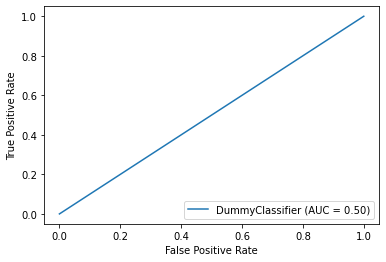

In [23]:
plot_roc_curve(dummy_model,X_train,y_train)

50% - not great results.

Accuracy Score:
Train - 0.5451303155006859
Test - 0.5390946502057613
  
Precision Score:
Train - 0.5451303155006859
Test - 0.5390946502057613
  
Recall Score: 
Train - 1.0
Test - 1.0
  
F1 Score: 
Train - 0.7056107954545455
Test - 0.7005347593582888
  
ROC_AUC: 
Train - 0.5
Test - 0.5
  
  
Confusion matrix for test data


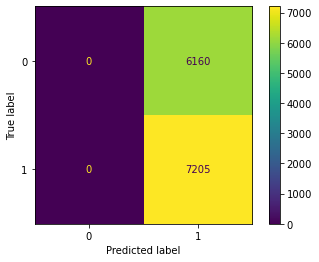

In [24]:
evaluate(dummy_model,X_train,y_train,X_val,y_val)

Since we combined our non-functional and functional needs repair targets, our target data is already pretty balanced. We will need to strengthen our model validation in order to determine what is a real prediction, and what is a result of random chance.

### Logistic Regression Modeling

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# we are using no penalty because 
log_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression())
])
cross_validate(log_classifier, X_train, y_train, return_train_score=True)

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

{'fit_time': array([2.01132178, 1.68593407, 1.67639112, 1.76014209, 1.72365713]),
 'score_time': array([0.22899604, 0.20945692, 0.18483806, 0.18972015, 0.18397808]),
 'test_score': array([0.68150642, 0.68138172, 0.6775159 , 0.67015837, 0.67951116]),
 'train_score': array([0.67654945, 0.67651827, 0.67770296, 0.67542711, 0.67910587])}

The model can't find the minimum. Let's try another solver, saga, that can deal with large datasets.

In [27]:
log_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(solver='saga'))
])
cross_validate(log_classifier, X_train, y_train, return_train_score=True)

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/elylin/opt/an

{'fit_time': array([2.35502696, 2.28888774, 2.09236288, 2.08377075, 2.08168483]),
 'score_time': array([0.23832393, 0.21026206, 0.17106318, 0.17069697, 0.17013597]),
 'test_score': array([0.66404789, 0.66953485, 0.6515775 , 0.65057987, 0.66142911]),
 'train_score': array([0.67124953, 0.67436713, 0.67075072, 0.67471006, 0.67383714])}

In [28]:
log_classifier.fit(X_train,y_train)

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['public_meeting',
                                                   'recorded_by', 'permit']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                         

Accuracy Score:
Train - 0.6730265619154508
Test - 0.6596333707444818
  
Precision Score:
Train - 0.679735338840258
Test - 0.6371334159438249
  
Recall Score: 
Train - 0.7567369721370728
Test - 0.8563497571131159
  
F1 Score: 
Train - 0.7161723316735223
Test - 0.7306530878086329
  
ROC_AUC: 
Train - 0.6647211563174672
Test - 0.6429476058292852
  
  
Confusion matrix for test data


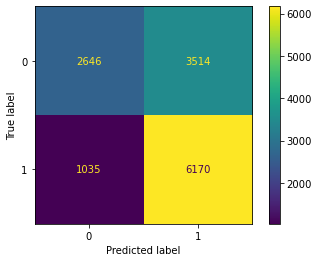

In [29]:
evaluate(log_classifier, X_train, y_train, X_val, y_val)

The model still didn't converge. Logistic regression is not very good at interaction terms which we'd expect in this dataset.

### KNN Modeling

In [30]:
# build a baseline Knn model
Knn_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [31]:
#Cross validate the X_train dataset
from sklearn.model_selection import cross_validate
cross_validate(Knn_classifier, X_train, y_train, return_train_score=True)

{'fit_time': array([1.53794098, 1.55418921, 1.50436687, 1.66702104, 1.62484193]),
 'score_time': array([2.09356213, 2.40665293, 2.14829588, 2.27155375, 2.12541699]),
 'test_score': array([0.74622771, 0.73637611, 0.73338321, 0.74385834, 0.74385834]),
 'train_score': array([0.83292805, 0.83333333, 0.83429979, 0.83168101, 0.83146278])}

Accuracy Score:
Train - 0.8376106746477117
Test - 0.7524130190796857
  
Precision Score:
Train - 0.8348607838002967
Test - 0.7561135945306338
  
Recall Score: 
Train - 0.8752344786567232
Test - 0.7981956974323386
  
F1 Score: 
Train - 0.8545710392888253
Test - 0.7765849706299373
  
ROC_AUC: 
Train - 0.8338777942137658
Test - 0.7485296668979875
  
  
Confusion matrix for test data


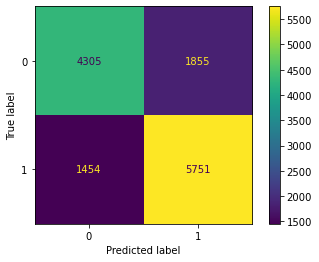

In [32]:
#Evaluate the function
Knn_classifier.fit(X_train,y_train)
evaluate(Knn_classifier, X_train, y_train, X_val, y_val)

KNN has good scores, way better than Logistic Regression, but as we add more data to the model, it's going to take more and more time to run. So we are not going to use KNN model. 

### Decision Tree Modeling

In [33]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier 
# set up pipeline for decision tree models
dt = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())])

In [34]:
# baseline decision tree model
cross_validate(dt, X_train, y_train, return_train_score = True)

{'fit_time': array([1.60072303, 1.52919674, 1.52935886, 1.50707293, 1.56705713]),
 'score_time': array([0.17394686, 0.20287204, 0.17058802, 0.20232987, 0.17028093]),
 'test_score': array([0.76131687, 0.76580621, 0.74622771, 0.76817558, 0.76817558]),
 'train_score': array([0.99947001, 0.99950118, 0.99956354, 0.99962589, 0.99950118])}

Accuracy Score:
Train - 0.9994762439206883
Test - 0.7695473251028807
  
Precision Score:
Train - 0.9998626499404817
Test - 0.7879380147982689
  
Recall Score: 
Train - 0.999176465205655
Test - 0.7833448993754337
  
F1 Score: 
Train - 0.9995194398041145
Test - 0.7856347438752784
  
ROC_AUC: 
Train - 0.9995059867425358
Test - 0.7683769951422623
  
  
Confusion matrix for test data


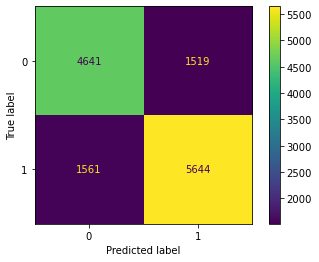

In [35]:
dt.fit(X_train, y_train)
evaluate(dt, X_train, y_train, X_val, y_val)

- The score is way better on the training set than the test set so the model is definitely overfitted, which is expected for an untuned decision tree model. 

#### Improve Decision Tree by Gridsearching

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# correct for overfitting by limiting max depth and minimum samples split
dt_grid_params = {'classifier__max_depth':[1,5,10], 'classifier__min_samples_split':[2,10,100]}

In [38]:
# Gridsearch for best precision score because that's what we want to maximize according to our business problem
dt_grid = GridSearchCV(dt, dt_grid_params, scoring = 'precision')
dt_output = dt_grid.fit(X_train, y_train)

In [39]:
# See the gridsearch result
dt_output.best_params_

{'classifier__max_depth': 10, 'classifier__min_samples_split': 10}

In [40]:
dt_best_model = dt_output.best_estimator_

Accuracy Score:
Train - 0.7945379723157501
Test - 0.76109240553685
  
Precision Score:
Train - 0.7719992011184342
Test - 0.7407007439404848
  
Recall Score: 
Train - 0.8842476094614997
Test - 0.8567661346287301
  
F1 Score: 
Train - 0.8243197133839462
Test - 0.7945170216873673
  
ROC_AUC: 
Train - 0.7856373478824112
Test - 0.7529772231585209
  
  
Confusion matrix for test data


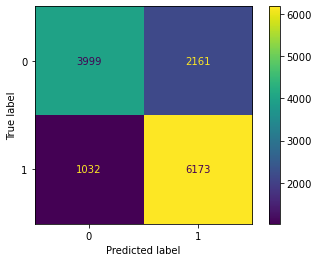

In [41]:
#Evaluate the model
evaluate(dt_best_model, X_train, y_train, X_val, y_val)

#### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# setting up pipeline for random forest models
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())])

In [44]:
# set up parameter grid
rfc_grid_params = {'classifier__n_estimators': [1,10,100], 'classifier__max_depth':[1,5,10], 'classifier__min_samples_split':[2,10,100], 'classifier__max_features': ['sqrt','log2', None], 'classifier__max_samples': [0.1,0.3,0.5]}

In [45]:
# Gridsearch for best precision score 
rfc_grid = GridSearchCV(rfc, rfc_grid_params, scoring = 'precision')
rfc_output = rfc_grid.fit(X_train, y_train)

In [46]:
# See the gridsearch result
rfc_output.best_params_

{'classifier__max_depth': 10,
 'classifier__max_features': 'sqrt',
 'classifier__max_samples': 0.5,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 100}

In [47]:
rfc_best_model = rfc_output.best_estimator_

Accuracy Score:
Train - 0.8166105499438833
Test - 0.7817433595211373
  
Precision Score:
Train - 0.7754691179822228
Test - 0.7428086070215175
  
Recall Score: 
Train - 0.9340257125863568
Test - 0.9103400416377515
  
F1 Score: 
Train - 0.8473943091961896
Test - 0.8180854381041471
  
ROC_AUC: 
Train - 0.804961096231768
Test - 0.7708356052344603
  
  
Confusion matrix for test data


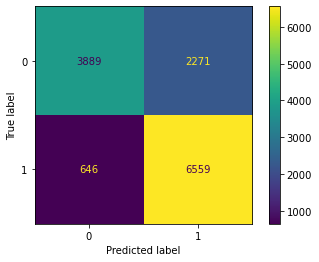

In [48]:
# Evaluate the model
evaluate(rfc_best_model, X_train, y_train, X_val, y_val)

#### Catboost

In [2]:
from catboost import CatBoostClassifier

In [24]:
cbc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier())])

In [25]:
cbc.fit(X_train, y_train)

Learning rate set to 0.049826
0:	learn: 0.6755647	total: 73ms	remaining: 1m 12s
1:	learn: 0.6599110	total: 82.6ms	remaining: 41.2s
2:	learn: 0.6463422	total: 93.5ms	remaining: 31.1s
3:	learn: 0.6348247	total: 104ms	remaining: 26s
4:	learn: 0.6266172	total: 115ms	remaining: 22.9s
5:	learn: 0.6192409	total: 127ms	remaining: 21.1s
6:	learn: 0.6103050	total: 138ms	remaining: 19.5s
7:	learn: 0.6025273	total: 150ms	remaining: 18.6s
8:	learn: 0.5965877	total: 162ms	remaining: 17.8s
9:	learn: 0.5904847	total: 173ms	remaining: 17.1s
10:	learn: 0.5851902	total: 188ms	remaining: 16.9s
11:	learn: 0.5802419	total: 200ms	remaining: 16.5s
12:	learn: 0.5759181	total: 212ms	remaining: 16.1s
13:	learn: 0.5724812	total: 227ms	remaining: 16s
14:	learn: 0.5680805	total: 238ms	remaining: 15.6s
15:	learn: 0.5638960	total: 251ms	remaining: 15.5s
16:	learn: 0.5607442	total: 265ms	remaining: 15.3s
17:	learn: 0.5576339	total: 277ms	remaining: 15.1s
18:	learn: 0.5554012	total: 288ms	remaining: 14.9s
19:	learn: 0.

164:	learn: 0.4536644	total: 2.07s	remaining: 10.5s
165:	learn: 0.4532146	total: 2.08s	remaining: 10.5s
166:	learn: 0.4529234	total: 2.09s	remaining: 10.4s
167:	learn: 0.4527572	total: 2.1s	remaining: 10.4s
168:	learn: 0.4526071	total: 2.12s	remaining: 10.4s
169:	learn: 0.4523609	total: 2.13s	remaining: 10.4s
170:	learn: 0.4520891	total: 2.14s	remaining: 10.4s
171:	learn: 0.4518137	total: 2.15s	remaining: 10.4s
172:	learn: 0.4514367	total: 2.16s	remaining: 10.3s
173:	learn: 0.4512416	total: 2.18s	remaining: 10.3s
174:	learn: 0.4509304	total: 2.19s	remaining: 10.3s
175:	learn: 0.4506514	total: 2.2s	remaining: 10.3s
176:	learn: 0.4503062	total: 2.21s	remaining: 10.3s
177:	learn: 0.4501128	total: 2.22s	remaining: 10.3s
178:	learn: 0.4499207	total: 2.23s	remaining: 10.2s
179:	learn: 0.4496979	total: 2.24s	remaining: 10.2s
180:	learn: 0.4493056	total: 2.25s	remaining: 10.2s
181:	learn: 0.4489028	total: 2.27s	remaining: 10.2s
182:	learn: 0.4487556	total: 2.28s	remaining: 10.2s
183:	learn: 0.

330:	learn: 0.4179527	total: 4.11s	remaining: 8.31s
331:	learn: 0.4178473	total: 4.12s	remaining: 8.3s
332:	learn: 0.4176448	total: 4.14s	remaining: 8.29s
333:	learn: 0.4174974	total: 4.15s	remaining: 8.28s
334:	learn: 0.4173501	total: 4.17s	remaining: 8.27s
335:	learn: 0.4171573	total: 4.19s	remaining: 8.27s
336:	learn: 0.4169910	total: 4.2s	remaining: 8.26s
337:	learn: 0.4168152	total: 4.21s	remaining: 8.26s
338:	learn: 0.4166478	total: 4.23s	remaining: 8.25s
339:	learn: 0.4164730	total: 4.25s	remaining: 8.24s
340:	learn: 0.4161953	total: 4.26s	remaining: 8.23s
341:	learn: 0.4159475	total: 4.27s	remaining: 8.22s
342:	learn: 0.4157114	total: 4.29s	remaining: 8.21s
343:	learn: 0.4155065	total: 4.3s	remaining: 8.2s
344:	learn: 0.4152995	total: 4.31s	remaining: 8.19s
345:	learn: 0.4151518	total: 4.33s	remaining: 8.18s
346:	learn: 0.4150028	total: 4.34s	remaining: 8.17s
347:	learn: 0.4147729	total: 4.36s	remaining: 8.16s
348:	learn: 0.4146771	total: 4.37s	remaining: 8.15s
349:	learn: 0.41

490:	learn: 0.3956271	total: 6.13s	remaining: 6.36s
491:	learn: 0.3955258	total: 6.15s	remaining: 6.34s
492:	learn: 0.3954278	total: 6.16s	remaining: 6.33s
493:	learn: 0.3953227	total: 6.17s	remaining: 6.32s
494:	learn: 0.3952674	total: 6.18s	remaining: 6.31s
495:	learn: 0.3951902	total: 6.19s	remaining: 6.29s
496:	learn: 0.3951088	total: 6.21s	remaining: 6.28s
497:	learn: 0.3950350	total: 6.22s	remaining: 6.27s
498:	learn: 0.3948909	total: 6.23s	remaining: 6.26s
499:	learn: 0.3947463	total: 6.25s	remaining: 6.25s
500:	learn: 0.3946396	total: 6.26s	remaining: 6.24s
501:	learn: 0.3945195	total: 6.28s	remaining: 6.22s
502:	learn: 0.3944417	total: 6.29s	remaining: 6.21s
503:	learn: 0.3943411	total: 6.3s	remaining: 6.2s
504:	learn: 0.3942081	total: 6.31s	remaining: 6.19s
505:	learn: 0.3941581	total: 6.32s	remaining: 6.17s
506:	learn: 0.3940612	total: 6.33s	remaining: 6.16s
507:	learn: 0.3939420	total: 6.35s	remaining: 6.15s
508:	learn: 0.3938585	total: 6.36s	remaining: 6.14s
509:	learn: 0.

664:	learn: 0.3780715	total: 8.21s	remaining: 4.13s
665:	learn: 0.3779923	total: 8.22s	remaining: 4.12s
666:	learn: 0.3779132	total: 8.23s	remaining: 4.11s
667:	learn: 0.3778242	total: 8.25s	remaining: 4.1s
668:	learn: 0.3776751	total: 8.26s	remaining: 4.09s
669:	learn: 0.3775510	total: 8.27s	remaining: 4.07s
670:	learn: 0.3774580	total: 8.29s	remaining: 4.06s
671:	learn: 0.3773887	total: 8.3s	remaining: 4.05s
672:	learn: 0.3773076	total: 8.31s	remaining: 4.04s
673:	learn: 0.3772282	total: 8.32s	remaining: 4.03s
674:	learn: 0.3771433	total: 8.33s	remaining: 4.01s
675:	learn: 0.3770814	total: 8.35s	remaining: 4s
676:	learn: 0.3769871	total: 8.36s	remaining: 3.99s
677:	learn: 0.3768843	total: 8.37s	remaining: 3.98s
678:	learn: 0.3768260	total: 8.38s	remaining: 3.96s
679:	learn: 0.3767587	total: 8.39s	remaining: 3.95s
680:	learn: 0.3766768	total: 8.41s	remaining: 3.94s
681:	learn: 0.3766008	total: 8.42s	remaining: 3.93s
682:	learn: 0.3764755	total: 8.43s	remaining: 3.91s
683:	learn: 0.376

838:	learn: 0.3633211	total: 10.2s	remaining: 1.97s
839:	learn: 0.3632673	total: 10.3s	remaining: 1.95s
840:	learn: 0.3631807	total: 10.3s	remaining: 1.94s
841:	learn: 0.3631489	total: 10.3s	remaining: 1.93s
842:	learn: 0.3630773	total: 10.3s	remaining: 1.92s
843:	learn: 0.3630054	total: 10.3s	remaining: 1.91s
844:	learn: 0.3629256	total: 10.3s	remaining: 1.89s
845:	learn: 0.3628593	total: 10.3s	remaining: 1.88s
846:	learn: 0.3628016	total: 10.3s	remaining: 1.87s
847:	learn: 0.3627392	total: 10.4s	remaining: 1.86s
848:	learn: 0.3626856	total: 10.4s	remaining: 1.85s
849:	learn: 0.3625901	total: 10.4s	remaining: 1.84s
850:	learn: 0.3625217	total: 10.4s	remaining: 1.82s
851:	learn: 0.3624348	total: 10.4s	remaining: 1.81s
852:	learn: 0.3623389	total: 10.5s	remaining: 1.8s
853:	learn: 0.3623055	total: 10.5s	remaining: 1.79s
854:	learn: 0.3621852	total: 10.5s	remaining: 1.78s
855:	learn: 0.3621102	total: 10.5s	remaining: 1.76s
856:	learn: 0.3620487	total: 10.5s	remaining: 1.75s
857:	learn: 0

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('ohe_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('oh_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['public_meeting',
                                                   'recorded_by', 'permit']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                         

Accuracy Score:
Train - 0.8467888764185061
Test - 0.8048634493078938
  
Precision Score:
Train - 0.8251531203443139
Test - 0.7828923076923077
  
Recall Score: 
Train - 0.9122477924692318
Test - 0.8828591256072172
  
F1 Score: 
Train - 0.8665174594206992
Test - 0.8298760600130463
  
ROC_AUC: 
Train - 0.8402943096571404
Test - 0.7982477446217905
  
  
Confusion matrix for test data


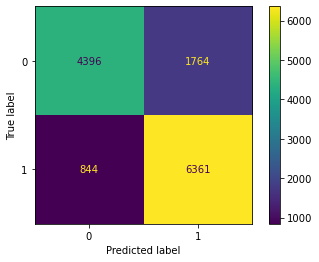

In [26]:
evaluate(cbc, X_train, y_train, X_val, y_val)

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any relevant modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?
- What does this final model tell you about the relationship between your inputs and outputs?

CatBoost Benefits:
- 

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [53]:
# code here to show your final model

In [49]:
importance = cbc['classifier'].get_feature_importance()

In [44]:
ohe_cols_after = cbc['preprocessor'].transformers_[0][1]['oh_encoder'].get_feature_names(ohe_cols)

In [46]:
ohe_cols_after

array(['public_meeting_False', 'public_meeting_True',
       'recorded_by_GeoData Consultants Ltd', 'permit_0', 'permit_True'],
      dtype=object)

In [47]:
columns = []
for c in num_cols:
    columns.append(c)
for c in ohe_cols_after:
    columns.append(c)
for c in freq_cols:
    columns.append(c)

In [48]:
columns

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'public_meeting_False',
 'public_meeting_True',
 'recorded_by_GeoData Consultants Ltd',
 'permit_0',
 'permit_True',
 'date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'scheme_management',
 'scheme_name',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_class',
 'waterpoint_type_group']

In [52]:
# zip columns with importance
dict_importance = dict(zip(columns,importance))

In [65]:
pd.DataFrame.from_dict(dict_importance, orient = 'index').sort_values(by=0, ascending=False)

,0
extraction_type_group,27.122525
water_quality,5.513616
waterpoint_type_group,5.242211
management_group,5.035640
quality_group,4.411531
permit_True,4.310923
payment_type,3.818963
subvillage,3.707412
date_recorded,3.250245
district_code,3.031143


In [67]:
X['extraction_type_group'].value_counts(normalize=True)

gravity            0.450842
nira/tanira        0.137273
other              0.108249
submersible        0.104024
swn 80             0.061785
mono               0.048232
india mark ii      0.040404
afridev            0.029798
rope pump          0.007593
other handpump     0.006128
other motorpump    0.002054
wind-powered       0.001970
india mark iii     0.001650
Name: extraction_type_group, dtype: float64

In [54]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- How could the stakeholder use your model effectively?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
